<a href="https://colab.research.google.com/github/diaputr/machine-learning/blob/main/UTS_Clustering_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentasi Gambar dengan Clustering

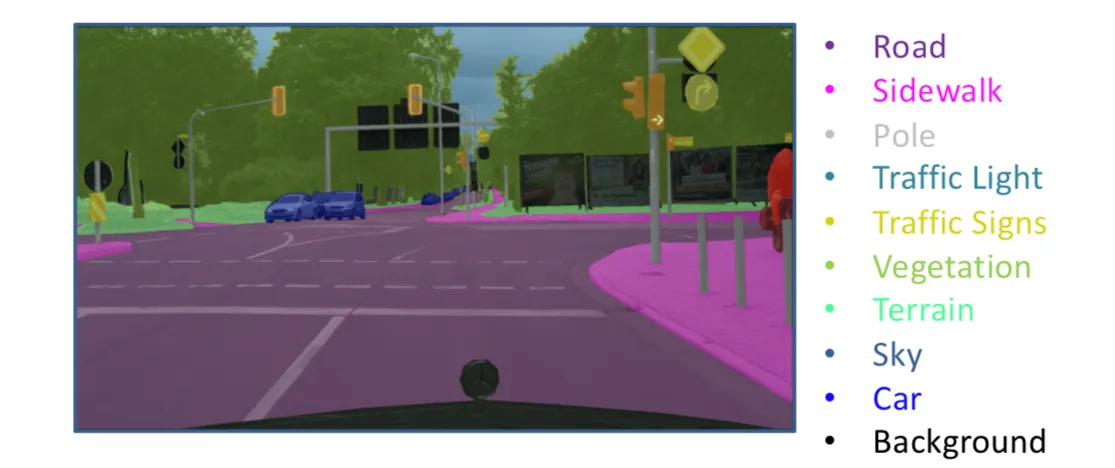

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

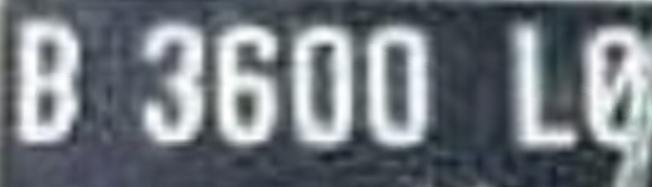

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

In [430]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/Shareddrives/Kita/Kuliah/SMT5/ML/UTS"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [431]:
import glob
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from numpy.random.mtrand import randint
from skimage.filters import threshold_otsu

In [432]:
# menampung array untuk gambar
plates = []

# mencari semua file yang ada dalam folder dummy
for x in glob.glob(f'{path}/dummy/*.jpg'):
  # membaca file gambar
  n = cv.imread(x)
  # konversi dari BGR ke RGB
  n = cv.cvtColor(n, cv.COLOR_BGR2RGB)
  # menambahkan gambar ke dalam list
  plates.append(n)

In [433]:
# menampung array untuk gambar random
img_rand = []

# loop 5 kali untuk memilih gambar
for r in range(5):
  # memilih indeks gambar acak antara 0-panjang plates
  rand = randint(0, len(plates))
  # menambahkan gambar yang dipilih secara acak
  img_rand.append(plates[rand])

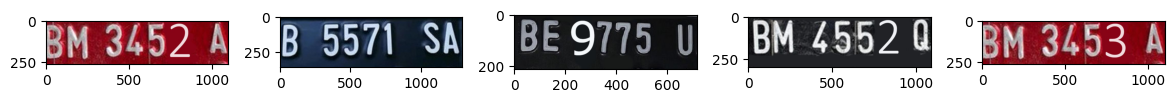

In [434]:
# menentukan lebar dan tinggi gambar
w, h = 12, 3

# membuat figur dengan ukuran tadi
plt.figure(figsize=(w, h))

# loop menampilkan gambar dalam img_rand
for i in range(5):
    # membuat subplot 1 baris 5 kolom dan subplot ke-i+1
    plt.subplot(1, 5, i+1)
    # mengatur tata letak subplot
    plt.tight_layout()
    # menampilkan gambar
    plt.imshow(img_rand[i])

# menampilkan keseluruhan plot
plt.show()

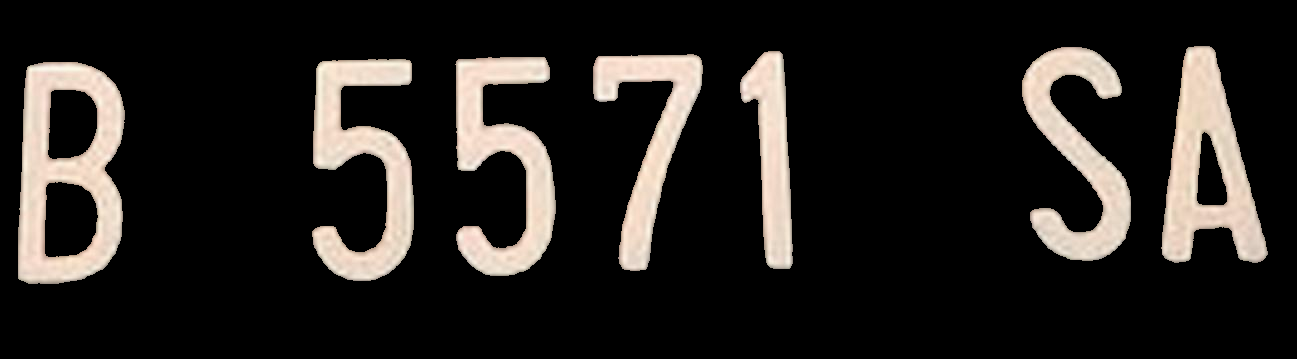

In [435]:
def masking(img):
    # tentukan warna putih terang dan putih gelap
    light_white = (255, 255, 255)
    dark_white = (128, 128, 128)

    # konversi citra ke HSV
    hsv_img0 = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    # konversi citra ke grayscale
    gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # threshold untuk proses binerisasi
    threshold_value = 128

    # proses binerisasi
    _, binary_image = cv.threshold(gray_image, threshold_value, 255, cv.THRESH_BINARY)
    # mask menggunakan rentang warna antara dark_white dan light_white
    mask = cv.inRange(img, dark_white, light_white)
    # gabungkan citra asli dengan mask
    return cv.bitwise_and(img, img, mask=mask)

# panggil fungsi masking untuk mendapatkan citra hasil
final = masking(img_rand[1])

# Tampilkan hasil
cv2_imshow(final)

In [436]:
def segmentasi(img):
    # persiapkan data pixel
    pixel_vals = np.float32(img.reshape((-1,3)))

    # kriteria berhenti untuk k-means
    kriteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.85)

    # lakukan k-means clustering
    k = 2
    _, labels, centers = cv.kmeans(pixel_vals, k, None, kriteria, 10, cv.KMEANS_RANDOM_CENTERS)

    # konversi data ke 8-bit
    centers = np.uint8(centers)

    # hasil segmentasi
    return centers[labels.flatten()].reshape((img.shape))

In [437]:
# array penampung gambar hasil segmentasi
segmentasi_img = []

# proses segmentasi pada setiap gambar
for img in img_rand:
    # memanggil fungsi segmentasi
    n = segmentasi(img)
    # menambahkan gambar hasil
    segmentasi_img.append(n)

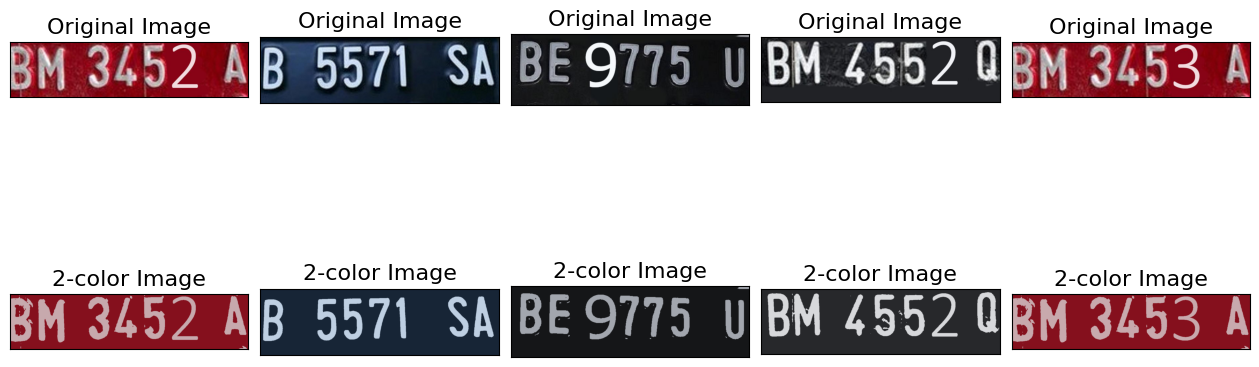

In [438]:
# membuat subplot 2x5 dengan ukuran dan tata letak yang sesuai
fig, ax = plt.subplots(2, 5, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))

# mengatur jarak antar subplot
fig.subplots_adjust(wspace=0.05)

# menampilkan gambar asli dalam baris 1 subplot
for i in range(len(img_rand)):
    ax[0][i].imshow(img_rand[i])
    ax[0][i].set_title('Original Image', size=16)

# menampilkan hasil segmentasi dalam baris 2 subplot
for j in range(len(segmentasi_img)):
    ax[1][j].imshow(segmentasi_img[j])
    ax[1][j].set_title('2-color Image', size=16)

# menampilkan plot
plt.show()

Dari studi kasus plat nomor ini, beberapa langkah yang dapat disimpulkan adalah:

1. Segmentasi Gambar: Proses ini digunakan untuk memisahkan plat nomor dari latar belakang dan elemen lain dalam gambar.

2. K-Means Clustering: Algoritma ini digunakan dalam segmentasi untuk mengelompokkan piksel gambar menjadi 2 kelompok berdasarkan warna, yang mewakili plat nomor dan latar belakang.

3. Penyesuaian Threshold: Sebuah nilai ambang digunakan untuk binerisasi gambar, yang membantu memisahkan elemen plat nomor dari latar belakang.

4. Visualisasi Hasil: Hasil segmentasi dievaluasi dengan membandingkan gambar asli dan gambar hasil segmentasi, dan keduanya ditampilkan dalam subplot yang sesuai.

Hasilnya adalah bahwa proses segmentasi berhasil memisahkan plat nomor dari latar belakang dan elemen lain dalam gambar, membuat plat nomor lebih jelas dan terlihat dengan baik. Proses ini merupakan langkah awal dalam pengolahan gambar plat nomor untuk keperluan deteksi dan pengenalan plat nomor.